In [10]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from main.Line import Line
from main.Nozzle import Nozzle
from main.Point import Point
from main.Profile import Profile

interactive(children=(FloatSlider(value=0.0, description='nozzle_x', max=5.0, min=-5.0), IntSlider(value=20, d…

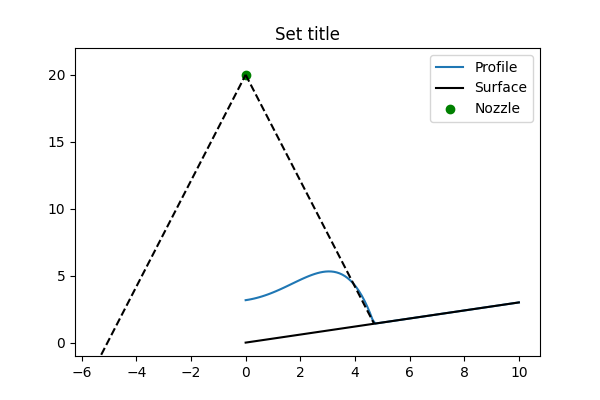

In [13]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.grid(True)

start_point = Point(0, 0)
end_point = Point(10, 3)
line = Line(start_point, end_point, number_of_points=100)
x_values = line.get_x_values()
y_values = line.get_y_values()


@widgets.interact(nozzle_x=(-5, 5, 0.1), nozzle_y=(5, 30, 1), title="Set title")
def update(nozzle_x=0, nozzle_y=20, title="default_title"):
    
    nozzle_position = Point(nozzle_x, nozzle_y)
    nozzle = Nozzle("nozzle1", nozzle_position)

    h_values = nozzle.get_spray_height_for_line(line)
    profile = Profile(line, h_values)

    [l.remove() for l in ax.lines]
    
    ax.clear()
    ax.set_ylim([start_point.x - 1, nozzle_y + 2])
    ax.plot(x_values, profile.get_y_values(), label="Profile")
    
    ax.plot(x_values, y_values, 'k', label="Surface")
    plt.plot(nozzle_x, nozzle_y, "og", label="Nozzle")
    plt.title(title)
    
    left_outer_line = nozzle.get_left_outer_line(line)
    right_outer_line = nozzle.get_right_outer_line(line)

    plt.plot(left_outer_line.get_x_values(), left_outer_line.get_y_values(), "--k")
    plt.plot(right_outer_line.get_x_values(), right_outer_line.get_y_values(), "--k")
    
    ax.legend()